# Function Testing Notebook - Joseph

This notebook is meant to test external-facing functions to ensure they are working as expected.

A dedicated test_all_functions.py with unit testing might be better, but this is a good benchmark

In [1]:
import os
import sys
from pathlib import Path
import time
import tempfile
import logging

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import mne
from dask_jobqueue import SLURMCluster
from dask.distributed import Client, LocalCluster

In [2]:
from pythoneeg import core
from pythoneeg import visualization
from pythoneeg import constants

print(core.__all__)
# print(visualization.__all__)
# print(dir(constants))

/mnt/isilon/marsh_single_unit/PythonEEG/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['DDFBinaryMetadata', 'LongRecordingOrganizer', 'convert_ddfcolbin_to_ddfrowbin', 'convert_ddfrowbin_to_si', 'convert_units_to_multiplier', 'convert_colpath_to_rowpath', 'filepath_to_index', 'is_day', 'set_temp_directory', 'get_temp_directory', 'parse_path_to_animalday', 'parse_str_to_genotype', 'parse_str_to_animal', 'parse_str_to_day', 'parse_chname_to_abbrev', 'nanaverage', 'LongRecordingAnalyzer', 'MountainSortAnalyzer', 'FragmentAnalyzer', '_log_transform']


In [3]:
tempdir = Path('../../tmp').resolve()
print(tempdir)
core.set_temp_directory(tempdir)

/mnt/isilon/marsh_single_unit/PythonEEG/tmp


In [4]:
data_folder = Path('./test-data').resolve()
lrec = core.LongRecordingOrganizer(base_folder_path= data_folder / 'A10 KO 12_13_2023',
                                    truncate=3)
lrec.convert_colbins_to_rowbins(overwrite=False)
lrec.convert_rowbins_to_rec()

/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/core/core.py:209: UserWarning: truncate = True. Only the first 3 files of each animal will be used
  warnings.warn(f"truncate = True. Only the first {self.n_truncate} files of each animal will be used")


In [5]:
Path('./test-wars/A5').resolve()

PosixPath('/mnt/isilon/marsh_single_unit/PythonEEG/notebooks/tests/test-wars/A5')

In [6]:
# Set up logger with detailed formatting
logging.basicConfig(format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG, stream=sys.stdout, force=True)
logger = logging.getLogger()


In [7]:
cluster = LocalCluster()
display(cluster)

2025-05-20 22:39:51,073 - DEBUG - Using selector: EpollSelector


LocalCluster(a2b15fb1, 'tcp://127.0.0.1:41535', workers=4, threads=4, memory=5.78 GiB)

In [8]:
# %%script true
# animal_ids = ['A5', 'A10', 'F22', 'G25', 'G26', 'N21', 'N22', 'N23', 'N24', 'N25']
# animal_ids = ['A5']
animal_ids = ['A10']
# animal_ids = ['F22']
# animal_ids = ['G25']
base_folder = Path('./test-data').resolve()
# base_folder = Path('/mnt/isilon/marsh_single_unit/PythonEEG Data Bins').resolve()
for animal_id in animal_ids:
    ao = visualization.AnimalOrganizer(base_folder, animal_id, mode="concat", assume_from_number=True, truncate=False)
    ao.convert_colbins_to_rowbins(overwrite=False)
    ao.convert_rowbins_to_rec() # parallelization breaks if not enough memory

    # with Client(cluster) as client:
    #     client.upload_file(str(packageroot / 'pythoneeg.zip'))
    #     display(client)
    #     print("running war")
    #     ao.convert_rowbins_to_rec(multiprocess_mode='dask') # paralleization breaks if not enough memory
    #     war = ao.compute_windowed_analysis(['all'], multiprocess_mode='dask')
    #     war.save_pickle_and_json(Path(f'./test-wars-full/{animal_id}').resolve())

    # with Client(cluster) as client:
    #     client.upload_file(str(packageroot / 'pythoneeg.zip'))
    #     display(client)
    #     print("running sar")
    #     sar = ao.compute_spike_analysis(multiprocess_mode='dask')

2025-05-20 22:40:06,335 - INFO - bin_folder_pattern: /mnt/isilon/marsh_single_unit/PythonEEG/notebooks/tests/test-data/*A10*
2025-05-20 22:40:06,336 - INFO - self._bin_folders: ['/mnt/isilon/marsh_single_unit/PythonEEG/notebooks/tests/test-data/A10 KO 12_13_2023']
2025-05-20 22:40:06,337 - INFO - self.bin_folder_names: ['A10 KO 12_13_2023']
2025-05-20 22:40:06,342 - DEBUG - Before prune: 1 colbins, 1 rowbins, 1 metas
2025-05-20 22:40:06,346 - DEBUG - After prune: 1 colbins, 1 rowbins, 1 metas
2025-05-20 22:40:06,390 - INFO - Converting 1 column-major binary files to row-major format
2025-05-20 22:40:06,391 - INFO - Overwrite flag not set - only generating missing row-major files
2025-05-20 22:40:06,399 - DEBUG - Before prune: 1 colbins, 1 rowbins, 1 metas
2025-05-20 22:40:06,400 - DEBUG - After prune: 1 colbins, 1 rowbins, 1 metas
2025-05-20 22:40:06,581 - INFO - self.animaldays: ['A10 KO Dec-13-2023']


Converting column bins to row bins:   0%|          | 0/1 [00:00<?, ?it/s]

2025-05-20 22:40:06,603 - INFO - Converting 1 column-major binary files to row-major format
2025-05-20 22:40:06,606 - INFO - Overwrite flag not set - only generating missing row-major files
2025-05-20 22:40:06,618 - DEBUG - Before prune: 1 colbins, 1 rowbins, 1 metas
2025-05-20 22:40:06,623 - DEBUG - After prune: 1 colbins, 1 rowbins, 1 metas


Converting row bins to recs: 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]


In [9]:
war = visualization.WindowAnalysisResult.load_pickle_and_json(Path('./test-wars/F22').resolve())

2025-05-20 22:40:10,949 - WARNING - Intan Input (1)/PortD D-009 does not match name aliases. Assuming alias from number in channel name.
2025-05-20 22:40:10,950 - WARNING - Intan Input (1)/PortD D-010 does not match name aliases. Assuming alias from number in channel name.
2025-05-20 22:40:10,952 - WARNING - Intan Input (1)/PortD D-012 does not match name aliases. Assuming alias from number in channel name.
2025-05-20 22:40:10,955 - WARNING - Intan Input (1)/PortD D-014 does not match name aliases. Assuming alias from number in channel name.
2025-05-20 22:40:10,956 - WARNING - Intan Input (1)/PortD D-015 does not match name aliases. Assuming alias from number in channel name.
2025-05-20 22:40:10,956 - WARNING - Intan Input (1)/PortD D-016 does not match name aliases. Assuming alias from number in channel name.
2025-05-20 22:40:10,957 - WARNING - Intan Input (1)/PortD D-017 does not match name aliases. Assuming alias from number in channel name.
2025-05-20 22:40:10,958 - WARNING - Intan

In [10]:
war.get_result(['all'], allow_missing=True).head(3)

,index,animalday,animal,day,genotype,duration,endfile,timestamp,isday,rms,...,logampvar,logpsdtotal,lognspike,psdband,psdfrac,logpsdband,logpsdfrac,cohere,pcorr,psd
0,0,F22 KO Dec-12-2023,F22,2023-12-12,KO,4.0,None,2023-12-12 12:49:13.560,True,"[324.54126, 123.114975, 89.73853, 199.99457, 3...",...,NaN,NaN,NaN,"{'delta': [2371.695324738739, 3296.14610609939...","{'delta': [0.7929006132423677, 0.3413720167377...",NaN,NaN,"{'delta': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,..."
1,1,F22 KO Dec-12-2023,F22,2023-12-12,KO,4.0,None,2023-12-12 12:49:17.560,True,"[33.98209, 98.85394, 73.50655, 72.370285, 407....",...,NaN,NaN,NaN,"{'delta': [190.0428130962193, 1800.43295303487...","{'delta': [0.3076867382203503, 0.2054261960346...",NaN,NaN,"{'delta': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,..."
2,2,F22 KO Dec-12-2023,F22,2023-12-12,KO,4.0,None,2023-12-12 12:49:21.560,True,"[39.47056, 100.14916, 70.84106, 86.55565, 620....",...,NaN,NaN,NaN,"{'delta': [306.9726448654066, 2821.06366983401...","{'delta': [0.3795687977069391, 0.3635538527127...",NaN,NaN,"{'delta': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,..."


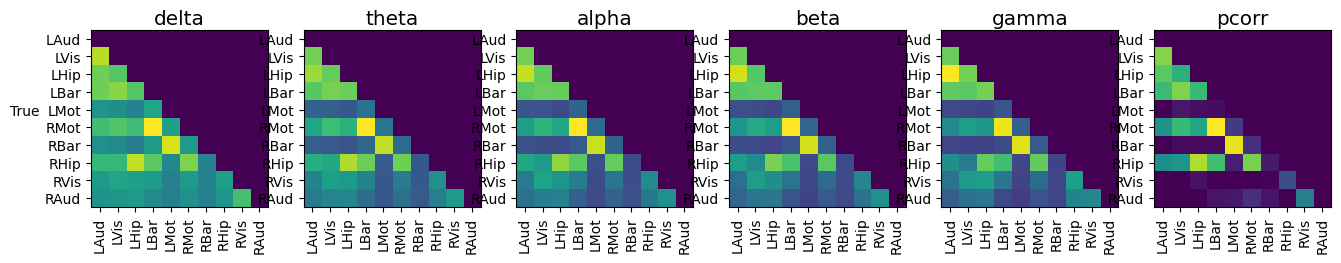

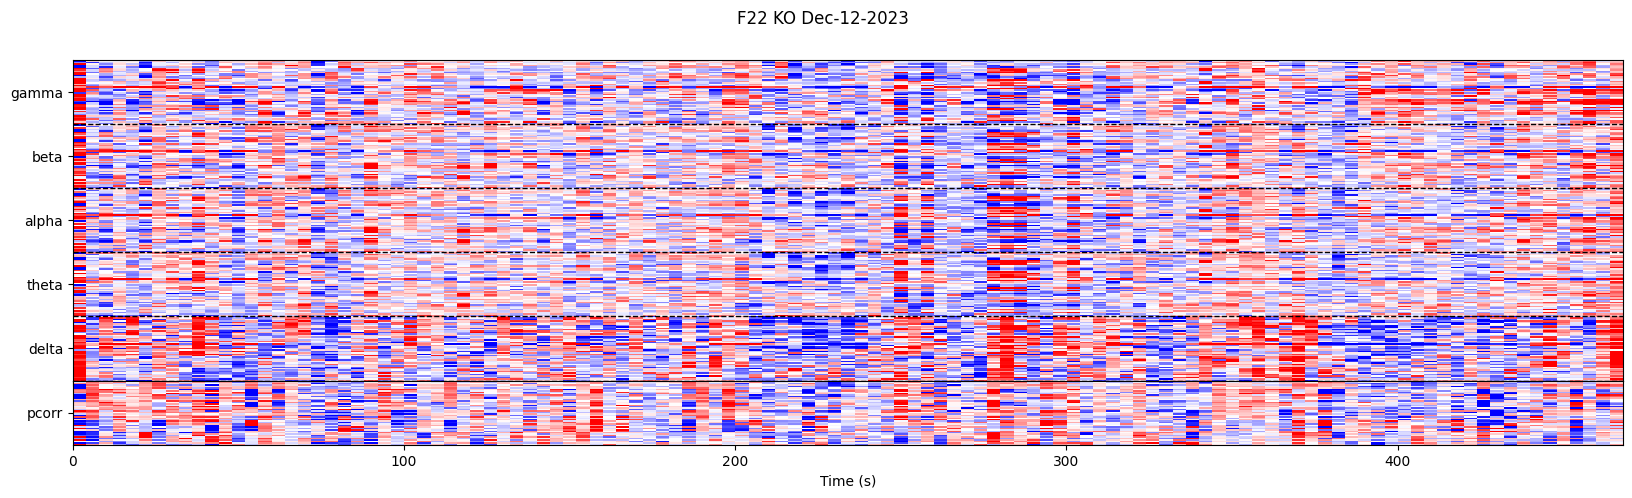

/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/animal.py:318: RuntimeWarning: divide by zero encountered in log10
  ax[0, i].plot(freqs, 10**(b + m * np.log10(freqs)), c=f'C{j}', alpha=0.75)


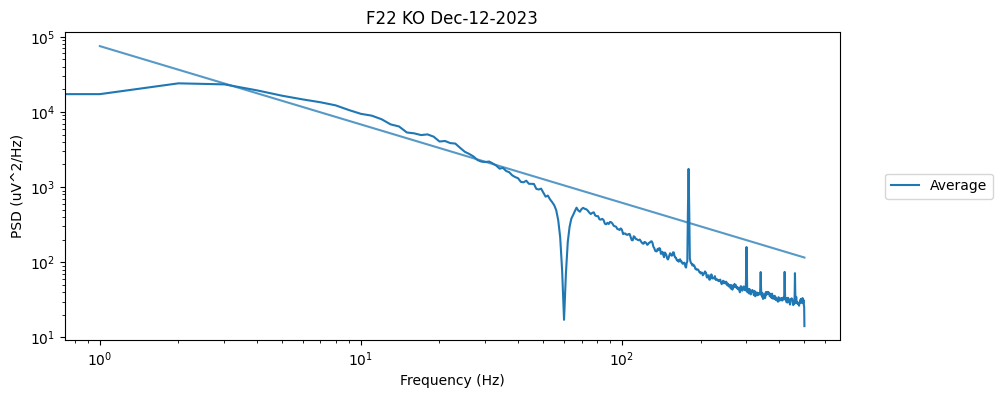

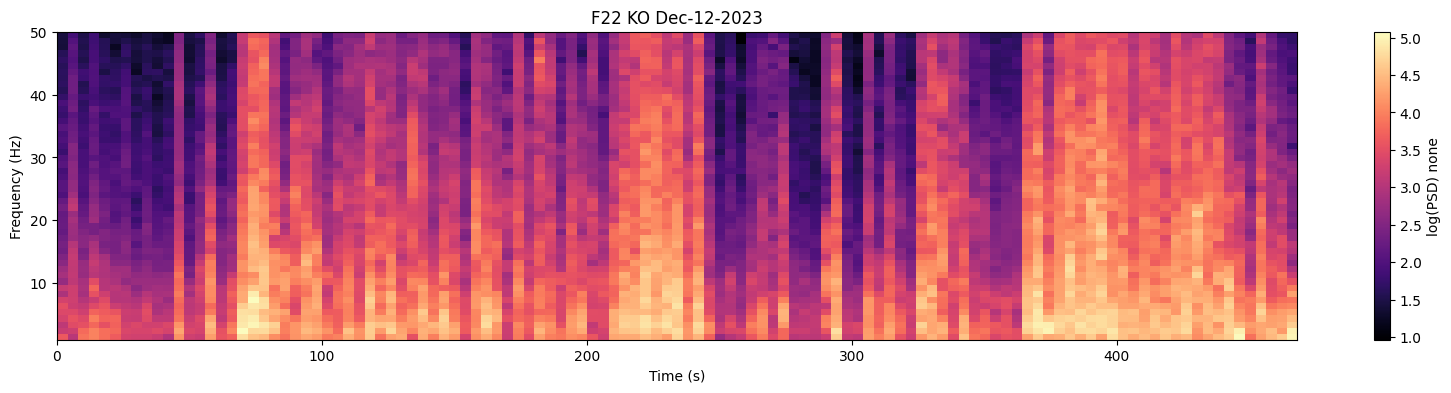

In [11]:
logger.setLevel(logging.WARNING)
ap = visualization.AnimalPlotter(war)
ap.plot_coherecorr_matrix(['isday'], bands=None, figsize=(16,5), cmap='viridis')
# ap.plot_coherecorr_diff(['isday'], bands=None, figsize=(16,5))
# ap.plot_linear_temporal(figsize=(20, 5), score_type='z', lw=1, channels=[0, 1])
# ap.plot_linear_temporal(['isday'], figsize=(20, 5), score_type='z', lw=1, channels=[0, 1, 2, 3])

# ap.plot_coherecorr_spectral(['isday'], figsize=(20, 5), score_type='center')

ap.plot_coherecorr_spectral(figsize=(20, 5), score_type='center')
ap.plot_psd_histogram(figsize=(10, 4), avg_channels=True, plot_type='loglog')
ap.plot_psd_spectrogram(figsize=(20, 4), mode='none')

In [13]:
logger.setLevel(logging.DEBUG)
wars = []
animal_ids = ['A10', 'F22']
for i, animal_id in enumerate(animal_ids):
    war = visualization.WindowAnalysisResult.load_pickle_and_json(Path(f'./test-wars/{animal_id}').resolve())
    # logging.critical(war.result.iloc[0]['pcorr'])
    # war = war.filter_all()
    # logging.critical(war.result.iloc[0]['pcorr'])
    if i == 1:
        # wrangle = war.result.copy()
        war_filt = war.filter_all(reject_channels=['LMot', 'RBar'], inplace=False)
        # wranglefilt = war_filt.result.copy()
        war = war_filt
    wars.append(war)
ep = visualization.ExperimentPlotter(wars,
                                     exclude=['nspike', 'logrms', 'logampvar', 'logpsdtotal', 'lognspike', 'logpsdband', 'logpsdfrac'])


2025-05-20 22:41:09,460 - WARNING - Intan Input (1)/PortC C-009 does not match name aliases. Assuming alias from number in channel name.
2025-05-20 22:41:09,463 - WARNING - Intan Input (1)/PortC C-010 does not match name aliases. Assuming alias from number in channel name.
2025-05-20 22:41:09,465 - WARNING - Intan Input (1)/PortC C-012 does not match name aliases. Assuming alias from number in channel name.
2025-05-20 22:41:09,467 - WARNING - Intan Input (1)/PortC C-014 does not match name aliases. Assuming alias from number in channel name.
2025-05-20 22:41:09,470 - WARNING - Intan Input (1)/PortC C-015 does not match name aliases. Assuming alias from number in channel name.
2025-05-20 22:41:09,470 - WARNING - Intan Input (1)/PortC C-016 does not match name aliases. Assuming alias from number in channel name.
2025-05-20 22:41:09,471 - WARNING - Intan Input (1)/PortC C-017 does not match name aliases. Assuming alias from number in channel name.
2025-05-20 22:41:09,472 - WARNING - Intan

Channel names: 	['Intan Input (1)/PortC C-009', 'Intan Input (1)/PortC C-010', 'Intan Input (1)/PortC C-012', 'Intan Input (1)/PortC C-014', 'Intan Input (1)/PortC C-015', 'Intan Input (1)/PortC C-016', 'Intan Input (1)/PortC C-017', 'Intan Input (1)/PortC C-019', 'Intan Input (1)/PortC C-021', 'Intan Input (1)/PortC C-022']
Channel abbreviations: 	['LAud', 'LVis', 'LHip', 'LBar', 'LMot', 'RMot', 'RBar', 'RHip', 'RVis', 'RAud']
2025-05-20 22:41:09,529 - WARNING - Intan Input (1)/PortD D-009 does not match name aliases. Assuming alias from number in channel name.
2025-05-20 22:41:09,536 - WARNING - Intan Input (1)/PortD D-010 does not match name aliases. Assuming alias from number in channel name.
2025-05-20 22:41:09,536 - WARNING - Intan Input (1)/PortD D-012 does not match name aliases. Assuming alias from number in channel name.
2025-05-20 22:41:09,537 - WARNING - Intan Input (1)/PortD D-014 does not match name aliases. Assuming alias from number in channel name.
2025-05-20 22:41:09,

In [14]:
# for feat in constants.LINEAR_FEATURE + ['psdband']:
#     logging.info(f'pulling {feat}')
#     df = ep._pull_timeseries_dataframe(feat, 'animal')
#     # display(df)
#     # ep.plot_boxplot_2(feat, ['genotype', 'animalday'], collapse_channels=False)
#     ep.plot_catplot(feat, 'animal', kind='violin')

# ep.plot_catplot('psdband', ['animal', 'isday', 'animalday'], 
#                 x='animal',
#                 col='isday',
#                 hue='band',
#                 kind='boxen',
#                 collapse_channels=False,
#                 catplot_params={'showfliers': False})

In [15]:
# for feat in ['cohere']:
#     logging.info(f'pulling {feat}')
#     df = ep._pull_timeseries_dataframe(feat, ['animal', 'isday'])
#     ep.plot_2d_feature_2(feat, ['animal', 'isday'], row='band')

2025-05-20 22:41:39,332 - DEBUG - groups: [('A10 KO Dec-13-2023', True), ('F22 KO Dec-12-2023', True)]
2025-05-20 22:41:39,333 - DEBUG - vals.shape: (31, 5, 10, 10)
2025-05-20 22:41:39,334 - DEBUG - vals.shape: (31, 5, 10, 10)
2025-05-20 22:41:39,353 - DEBUG - vals.shape: (117, 5, 10, 10)
2025-05-20 22:41:39,355 - DEBUG - vals.shape: (117, 5, 10, 10)
2025-05-20 22:41:39,715 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7fb15aa4e740>
2025-05-20 22:41:39,778 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7fb15aad4220>


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:406: RuntimeWarning: Mean of empty slice
  avg_matrix = np.nanmean(matrices, axis=0)


2025-05-20 22:41:40,176 - DEBUG - groups: ['A10 KO Dec-13-2023', 'F22 KO Dec-12-2023']
2025-05-20 22:41:40,178 - DEBUG - vals.shape: (31, 5, 10, 10)
2025-05-20 22:41:40,181 - DEBUG - vals.shape: (31, 5, 10, 10)
2025-05-20 22:41:40,193 - DEBUG - vals.shape: (117, 5, 10, 10)
2025-05-20 22:41:40,195 - DEBUG - vals.shape: (117, 5, 10, 10)
2025-05-20 22:41:40,782 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7fb15a655a20>
2025-05-20 22:41:40,832 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7fb15a6a24d0>
2025-05-20 22:41:40,879 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7fb15a6f8220>
2025-05-20 22:41:40,919 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7fb15a54ded0>
2025-05-20 22:41:41,267 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7fb15b38bd90>
2025-05-20 22:41:41,303 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7fb1a0111b70>
2025-05-20 22:41:41,340 - DEBUG - locator: <matplotlib.ticker.A

/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:406: RuntimeWarning: Mean of empty slice
  avg_matrix = np.nanmean(matrices, axis=0)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:406: RuntimeWarning: Mean of empty slice
  avg_matrix = np.nanmean(matrices, axis=0)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:406: RuntimeWarning: Mean of empty slice
  avg_matrix = np.nanmean(matrices, axis=0)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:406: RuntimeWarning: Mean of empty slice
  avg_matrix = np.nanmean(matrices, axis=0)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:406: RuntimeWarning: Mean of empty slice
  avg_matrix = np.nanmean(matrices, axis=0)


2025-05-20 22:41:42,259 - DEBUG - groups: [('KO', True)]
2025-05-20 22:41:42,260 - DEBUG - vals.shape: (31, 10, 10)
2025-05-20 22:41:42,266 - DEBUG - vals.shape: (117, 10, 10)
2025-05-20 22:41:42,361 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7fb18439b310>
2025-05-20 22:41:42,465 - DEBUG - groups: ['KO']
2025-05-20 22:41:42,467 - DEBUG - vals.shape: (31, 10, 10)
2025-05-20 22:41:42,469 - DEBUG - vals.shape: (117, 10, 10)
2025-05-20 22:41:42,550 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7fb15aec8040>


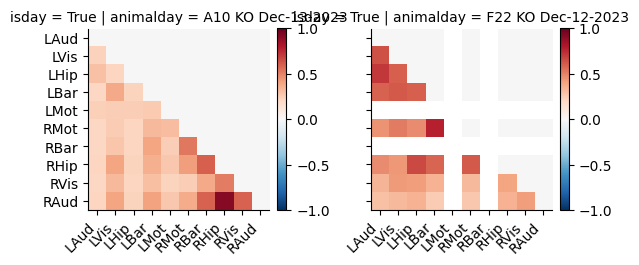

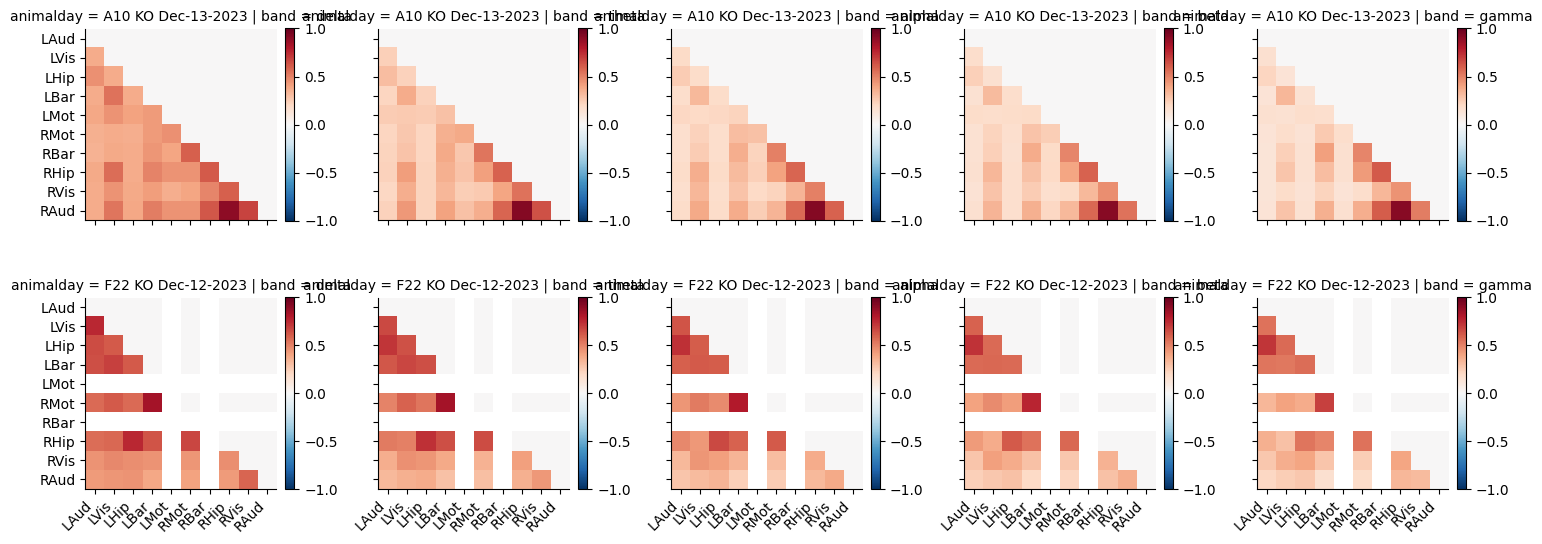

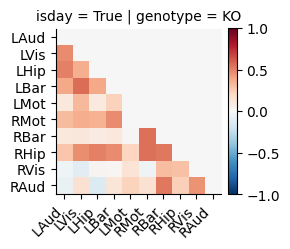

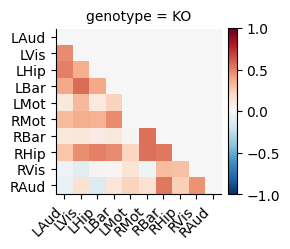

In [17]:
ep.plot_heatmap('cohere', groupby=['animalday', 'isday'])
ep.plot_heatmap('cohere', groupby='animalday', col='band', row='animalday')

ep.plot_heatmap('pcorr', groupby=['genotype', 'isday'])
ep.plot_heatmap('pcorr', groupby='genotype')

2025-05-20 22:43:36,250 - DEBUG - groups: ['KO']
2025-05-20 22:43:36,251 - DEBUG - vals.shape: (31, 10)
2025-05-20 22:43:36,253 - DEBUG - vals.shape: (117, 10)
2025-05-20 22:43:36,746 - DEBUG - groups: ['KO']
2025-05-20 22:43:36,747 - DEBUG - vals.shape: (31,)
2025-05-20 22:43:36,749 - DEBUG - vals.shape: (117,)
2025-05-20 22:43:36,908 - DEBUG - groups: [('KO', True)]
2025-05-20 22:43:36,912 - DEBUG - vals.shape: (31, 10)
2025-05-20 22:43:36,917 - DEBUG - vals.shape: (117, 10)


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:141: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-05-20 22:43:37,372 - DEBUG - groups: [('KO', True)]
2025-05-20 22:43:37,373 - DEBUG - vals.shape: (31,)
2025-05-20 22:43:37,375 - DEBUG - vals.shape: (117,)


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:141: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-05-20 22:43:37,582 - DEBUG - groups: ['KO']
2025-05-20 22:43:37,583 - DEBUG - vals.shape: (31, 10)
2025-05-20 22:43:37,585 - DEBUG - vals.shape: (117, 10)
2025-05-20 22:43:37,969 - DEBUG - groups: ['KO']
2025-05-20 22:43:37,970 - DEBUG - vals.shape: (31,)
2025-05-20 22:43:37,972 - DEBUG - vals.shape: (117,)


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:141: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-05-20 22:43:38,206 - DEBUG - groups: [('KO', True)]
2025-05-20 22:43:38,207 - DEBUG - vals.shape: (31, 10)
2025-05-20 22:43:38,209 - DEBUG - vals.shape: (117, 10)
2025-05-20 22:43:38,626 - DEBUG - groups: [('KO', True)]
2025-05-20 22:43:38,626 - DEBUG - vals.shape: (31,)
2025-05-20 22:43:38,629 - DEBUG - vals.shape: (117,)


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:141: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-05-20 22:43:38,877 - DEBUG - groups: ['KO']
2025-05-20 22:43:38,879 - DEBUG - vals.shape: (31, 10)
2025-05-20 22:43:38,881 - DEBUG - vals.shape: (117, 10)
2025-05-20 22:43:39,232 - DEBUG - groups: ['KO']
2025-05-20 22:43:39,233 - DEBUG - vals.shape: (31,)
2025-05-20 22:43:39,235 - DEBUG - vals.shape: (117,)
2025-05-20 22:43:39,427 - DEBUG - groups: [('KO', True)]
2025-05-20 22:43:39,428 - DEBUG - vals.shape: (31, 10)
2025-05-20 22:43:39,431 - DEBUG - vals.shape: (117, 10)


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:141: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-05-20 22:43:39,867 - DEBUG - groups: [('KO', True)]
2025-05-20 22:43:39,869 - DEBUG - vals.shape: (31,)
2025-05-20 22:43:39,874 - DEBUG - vals.shape: (117,)


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:141: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-05-20 22:43:40,154 - DEBUG - groups: ['KO']
2025-05-20 22:43:40,155 - DEBUG - vals.shape: (31, 10)
2025-05-20 22:43:40,157 - DEBUG - vals.shape: (117, 10)
2025-05-20 22:43:40,669 - DEBUG - groups: ['KO']
2025-05-20 22:43:40,670 - DEBUG - vals.shape: (31,)
2025-05-20 22:43:40,672 - DEBUG - vals.shape: (117,)


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:141: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-05-20 22:43:40,916 - DEBUG - groups: [('KO', True)]
2025-05-20 22:43:40,917 - DEBUG - vals.shape: (31, 10)
2025-05-20 22:43:40,919 - DEBUG - vals.shape: (117, 10)
2025-05-20 22:43:41,373 - DEBUG - groups: [('KO', True)]
2025-05-20 22:43:41,374 - DEBUG - vals.shape: (31,)
2025-05-20 22:43:41,376 - DEBUG - vals.shape: (117,)


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:141: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-05-20 22:43:41,625 - DEBUG - groups: ['KO']
2025-05-20 22:43:41,626 - DEBUG - vals.shape: (31, 10)
2025-05-20 22:43:41,627 - DEBUG - vals.shape: (117, 10)
2025-05-20 22:43:42,096 - DEBUG - groups: ['KO']
2025-05-20 22:43:42,097 - DEBUG - vals.shape: (31,)
2025-05-20 22:43:42,099 - DEBUG - vals.shape: (117,)
2025-05-20 22:43:42,266 - DEBUG - groups: [('KO', True)]
2025-05-20 22:43:42,267 - DEBUG - vals.shape: (31, 10)
2025-05-20 22:43:42,269 - DEBUG - vals.shape: (117, 10)


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:141: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-05-20 22:43:42,713 - DEBUG - groups: [('KO', True)]
2025-05-20 22:43:42,714 - DEBUG - vals.shape: (31,)
2025-05-20 22:43:42,717 - DEBUG - vals.shape: (117,)


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:141: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-05-20 22:43:42,949 - DEBUG - groups: ['KO']
2025-05-20 22:43:42,951 - DEBUG - vals.shape: (31, 10)
2025-05-20 22:43:42,952 - DEBUG - vals.shape: (117, 10)


/mnt/isilon/marsh_single_unit/PythonEEG/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


2025-05-20 22:43:43,312 - DEBUG - groups: ['KO']
2025-05-20 22:43:43,313 - DEBUG - vals.shape: (31,)
2025-05-20 22:43:43,314 - DEBUG - vals.shape: (117,)


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:141: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-05-20 22:43:43,522 - DEBUG - groups: [('KO', True)]
2025-05-20 22:43:43,523 - DEBUG - vals.shape: (31, 10)
2025-05-20 22:43:43,525 - DEBUG - vals.shape: (117, 10)
2025-05-20 22:43:43,918 - DEBUG - groups: [('KO', True)]
2025-05-20 22:43:43,919 - DEBUG - vals.shape: (31,)
2025-05-20 22:43:43,921 - DEBUG - vals.shape: (117,)


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:141: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-05-20 22:43:44,160 - DEBUG - groups: ['KO']
2025-05-20 22:43:44,161 - DEBUG - vals.shape: (31, 10, 2)
2025-05-20 22:43:44,164 - DEBUG - vals.shape: (117, 10, 2)
2025-05-20 22:43:44,981 - DEBUG - groups: ['KO']
2025-05-20 22:43:44,983 - DEBUG - vals.shape: (31, 2)
2025-05-20 22:43:44,985 - DEBUG - vals.shape: (117, 2)
2025-05-20 22:43:45,159 - DEBUG - groups: [('KO', True)]
2025-05-20 22:43:45,160 - DEBUG - vals.shape: (31, 10, 2)
2025-05-20 22:43:45,165 - DEBUG - vals.shape: (117, 10, 2)


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:141: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-05-20 22:43:45,604 - DEBUG - groups: [('KO', True)]
2025-05-20 22:43:45,605 - DEBUG - vals.shape: (31, 2)
2025-05-20 22:43:45,608 - DEBUG - vals.shape: (117, 2)


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:141: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-05-20 22:43:45,831 - DEBUG - groups: ['KO']
2025-05-20 22:43:45,832 - DEBUG - vals.shape: (31, 10, 2)
2025-05-20 22:43:45,836 - DEBUG - vals.shape: (117, 10, 2)
2025-05-20 22:43:46,328 - DEBUG - groups: ['KO']
2025-05-20 22:43:46,329 - DEBUG - vals.shape: (31, 2)
2025-05-20 22:43:46,331 - DEBUG - vals.shape: (117, 2)
2025-05-20 22:43:46,510 - DEBUG - groups: [('KO', True)]
2025-05-20 22:43:46,511 - DEBUG - vals.shape: (31, 10, 2)
2025-05-20 22:43:46,513 - DEBUG - vals.shape: (117, 10, 2)


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:141: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-05-20 22:43:46,912 - DEBUG - groups: [('KO', True)]
2025-05-20 22:43:46,913 - DEBUG - vals.shape: (31, 2)
2025-05-20 22:43:46,916 - DEBUG - vals.shape: (117, 2)


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:141: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


Skipping feature nspike
Skipping feature logrms
Skipping feature logampvar
Skipping feature logpsdtotal
Skipping feature lognspike
2025-05-20 22:43:47,133 - DEBUG - groups: [('KO', True)]
2025-05-20 22:43:47,134 - DEBUG - vals.shape: (31, 5)
2025-05-20 22:43:47,137 - DEBUG - vals.shape: (117, 5)


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:141: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-05-20 22:43:47,456 - DEBUG - groups: ['KO']
2025-05-20 22:43:47,457 - DEBUG - vals.shape: (31, 5)
2025-05-20 22:43:47,460 - DEBUG - vals.shape: (117, 5)


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:141: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-05-20 22:43:47,764 - DEBUG - groups: [('KO', True)]
2025-05-20 22:43:47,766 - DEBUG - vals.shape: (31, 5)
2025-05-20 22:43:47,780 - DEBUG - vals.shape: (117, 5)


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:141: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-05-20 22:43:48,094 - DEBUG - groups: ['KO']
2025-05-20 22:43:48,096 - DEBUG - vals.shape: (31, 5)
2025-05-20 22:43:48,098 - DEBUG - vals.shape: (117, 5)


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:141: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


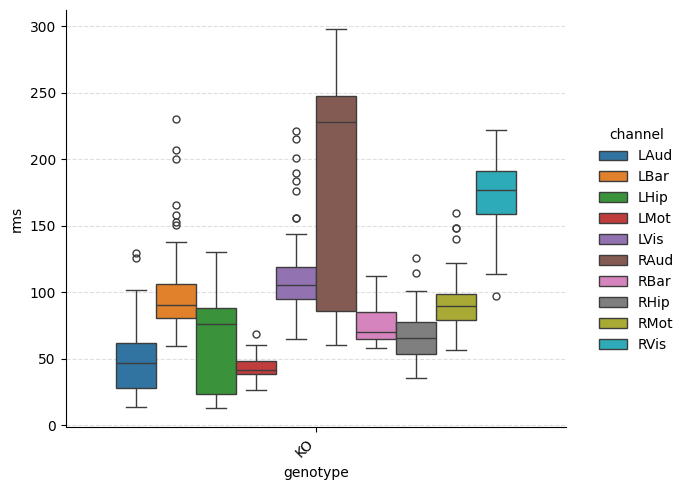

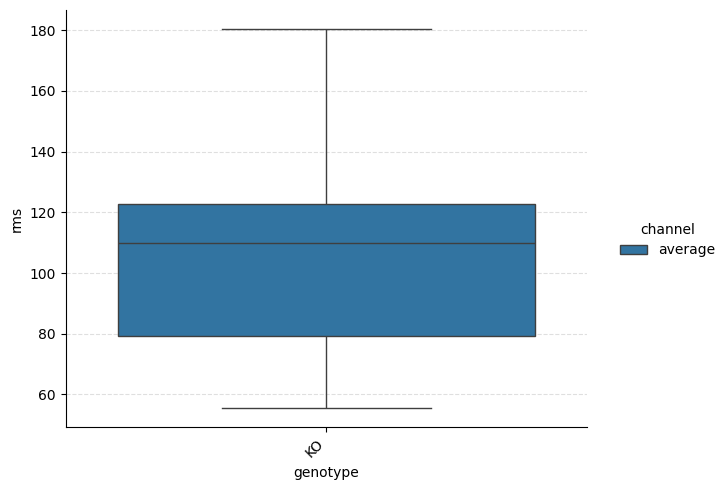

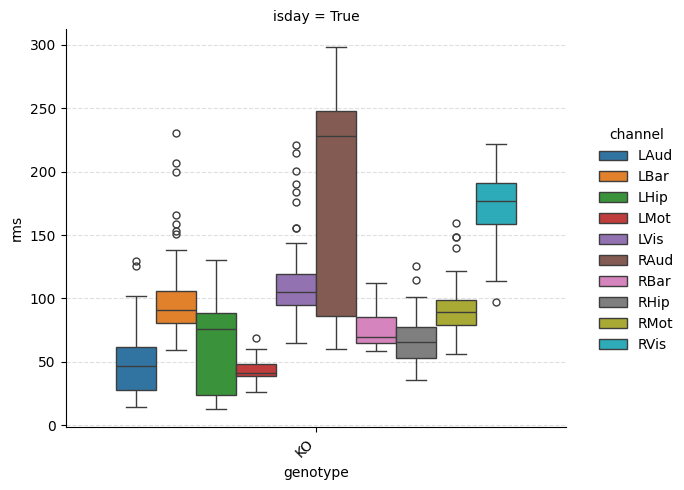

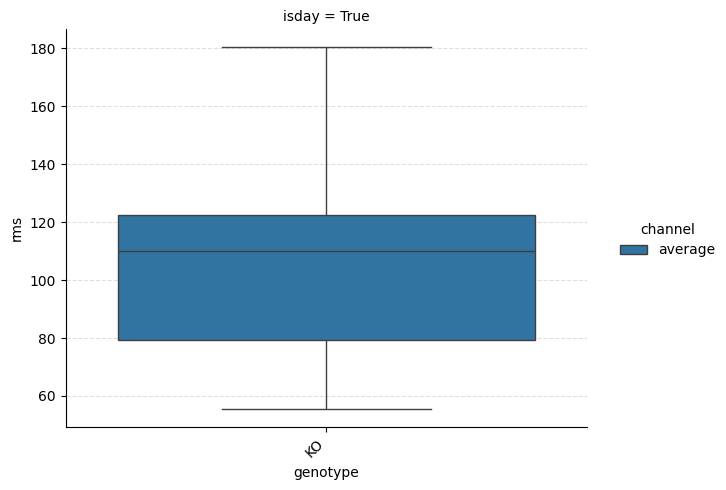

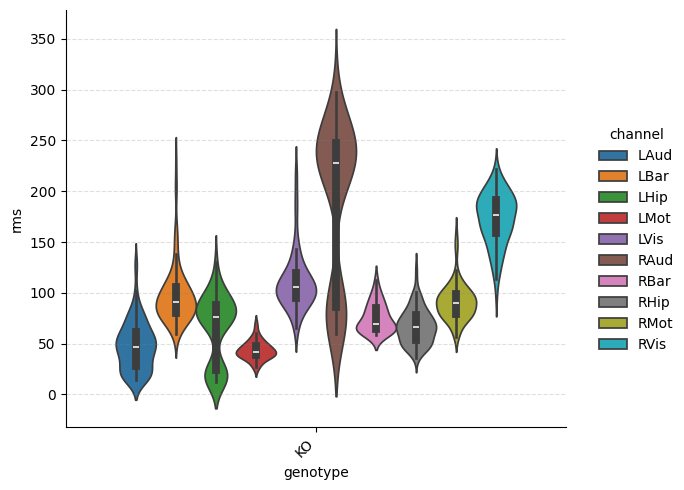

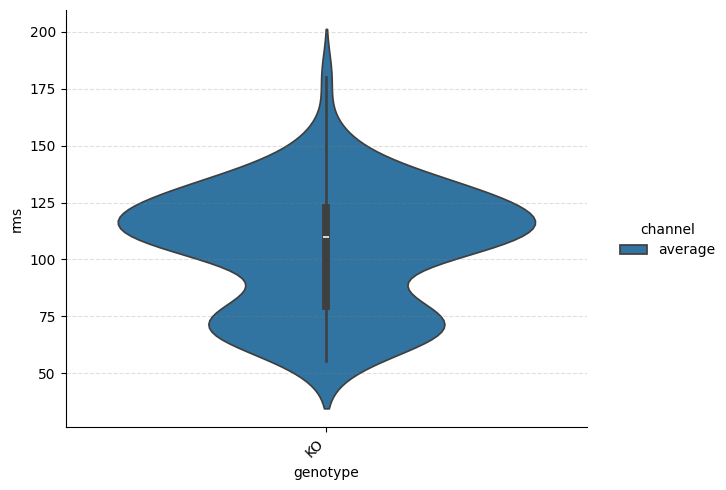

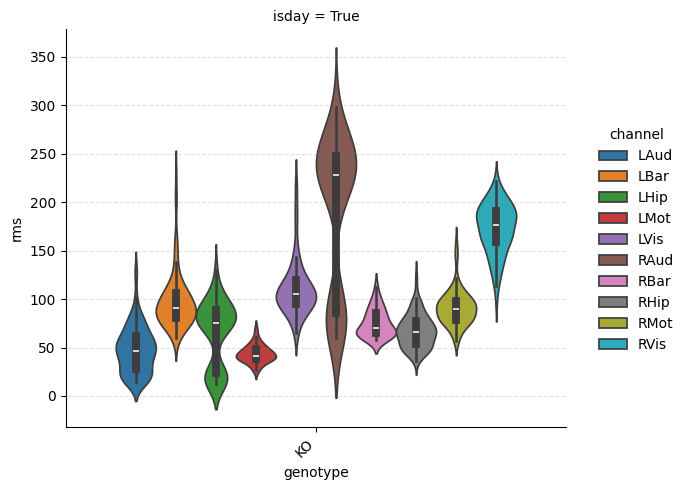

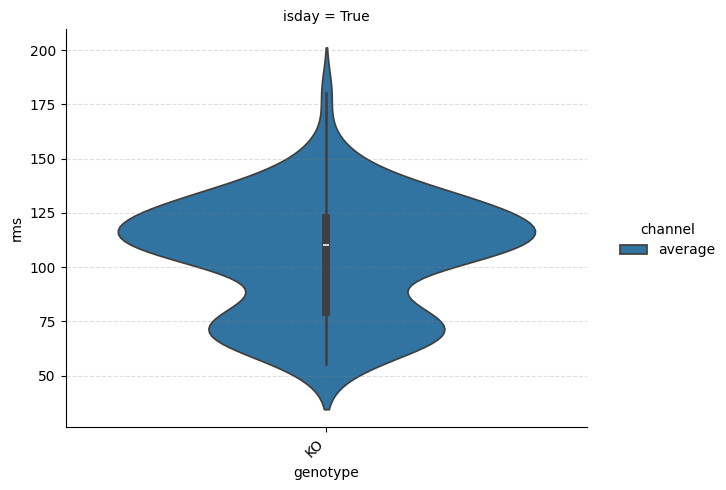

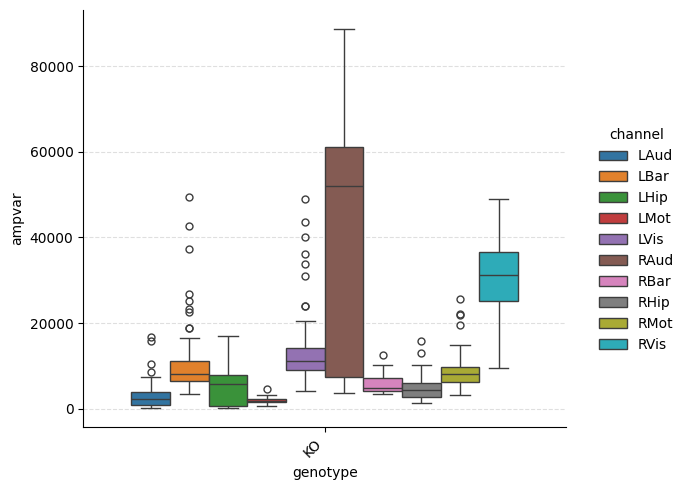

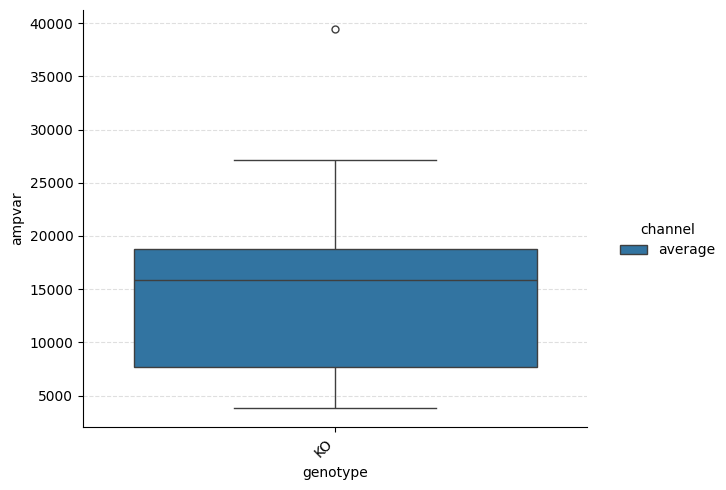

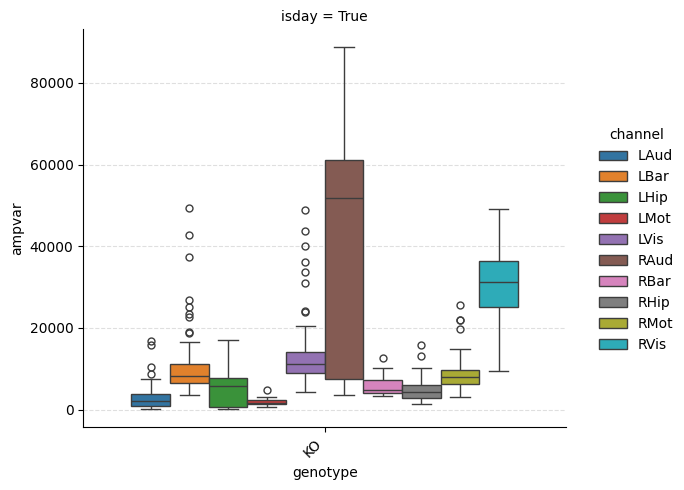

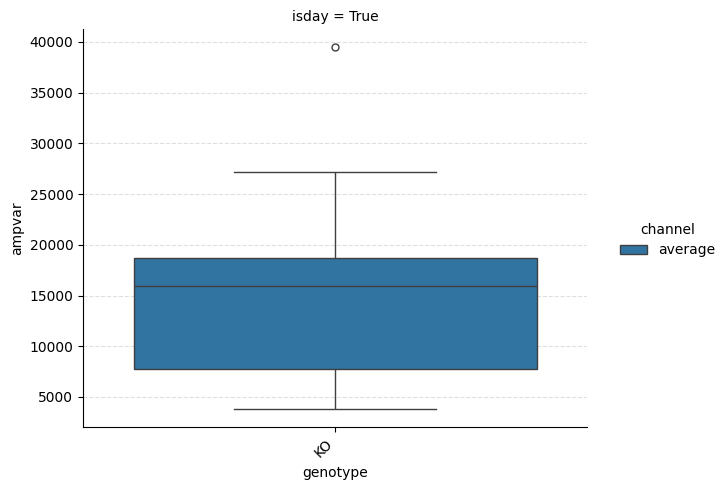

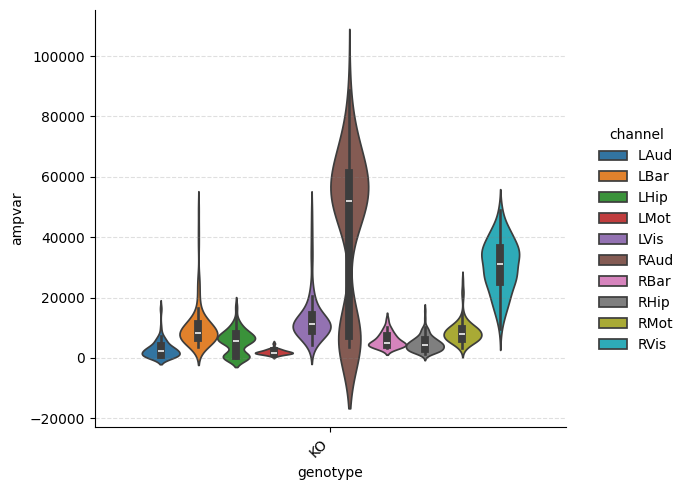

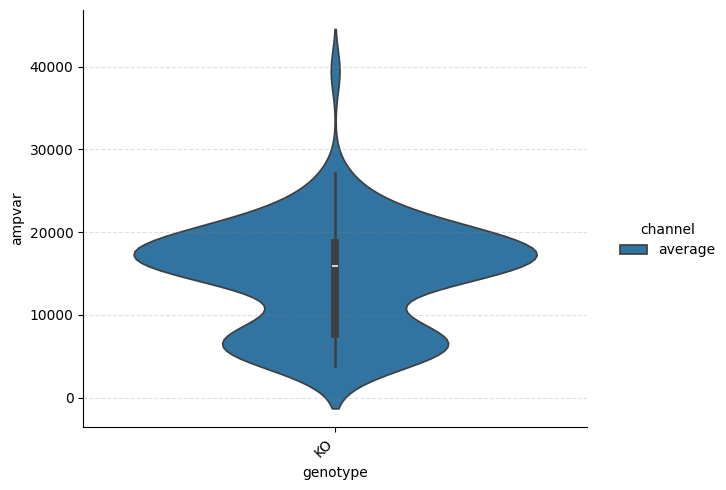

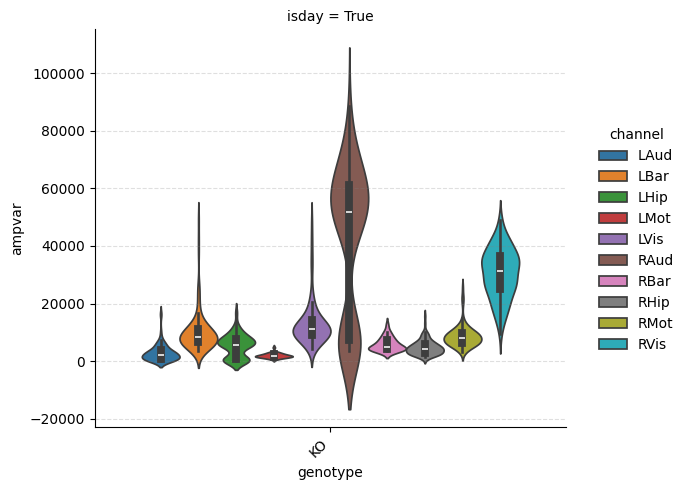

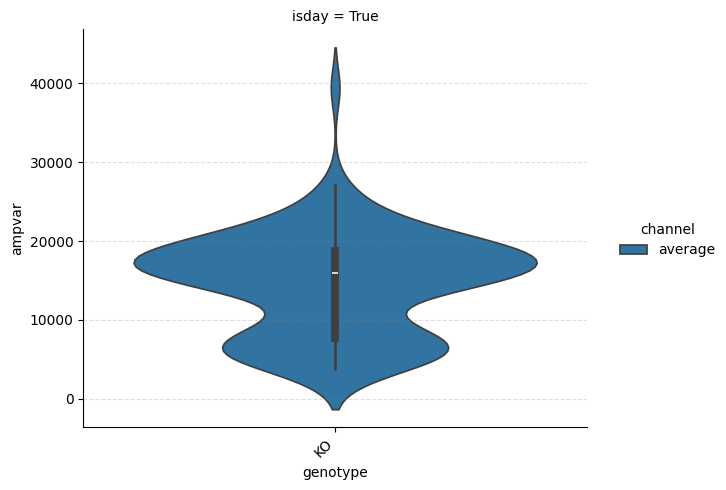

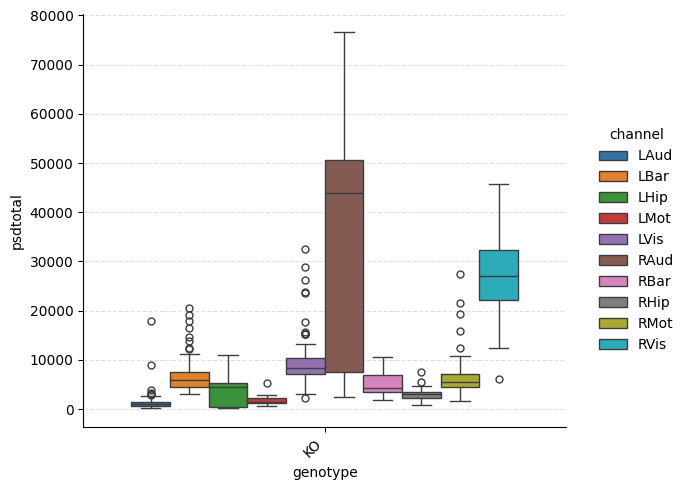

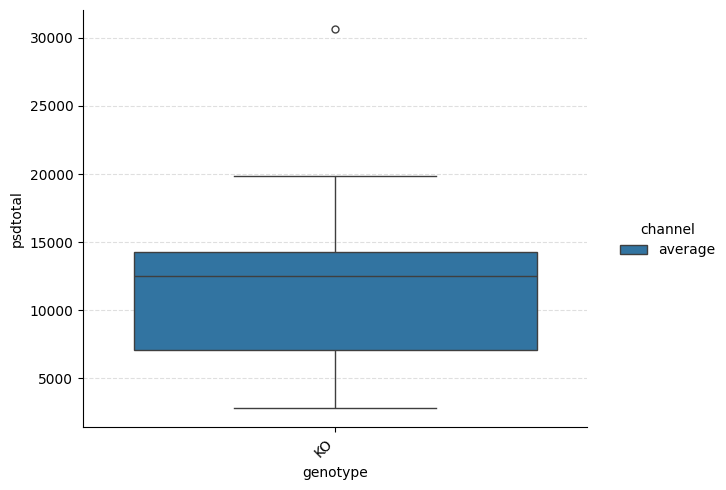

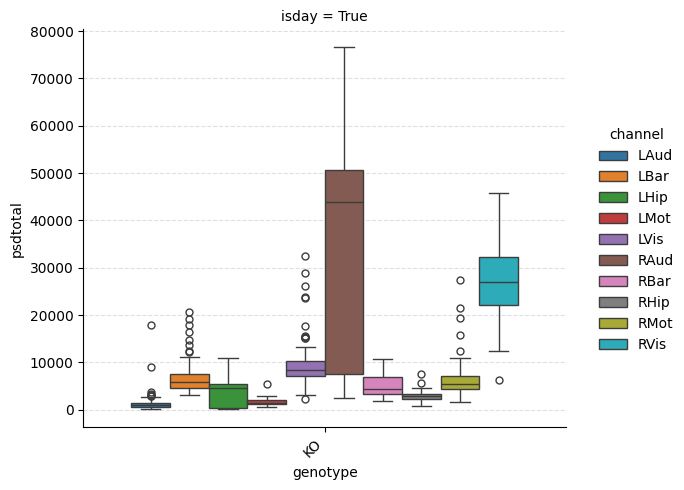

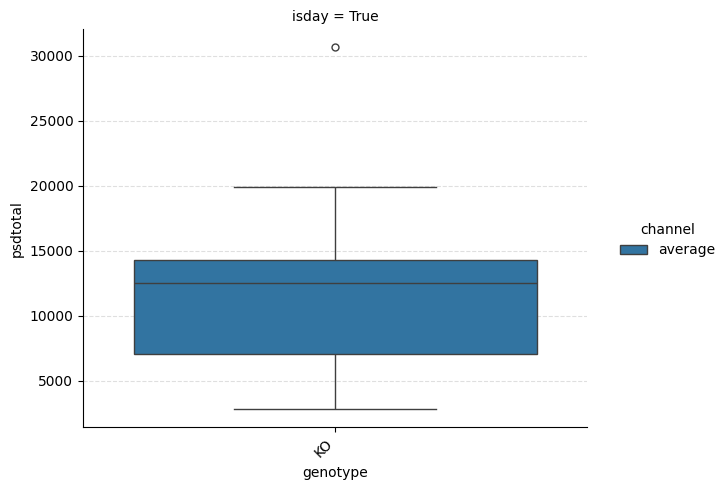

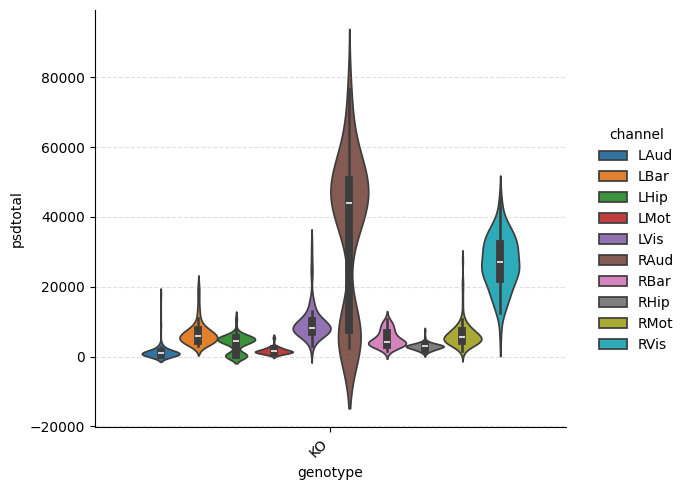

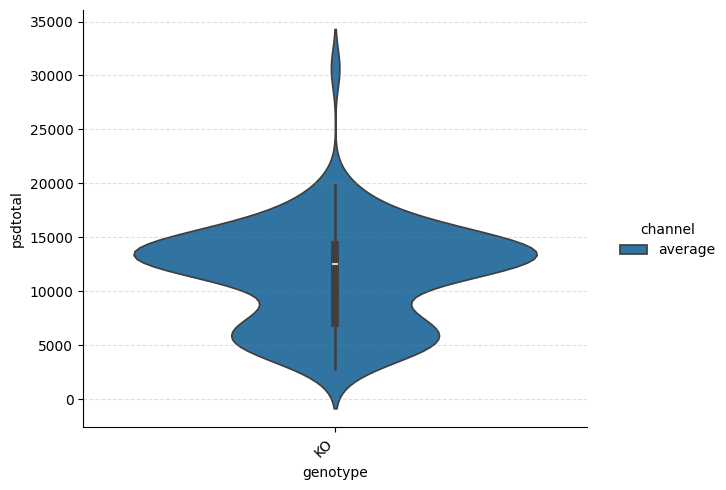

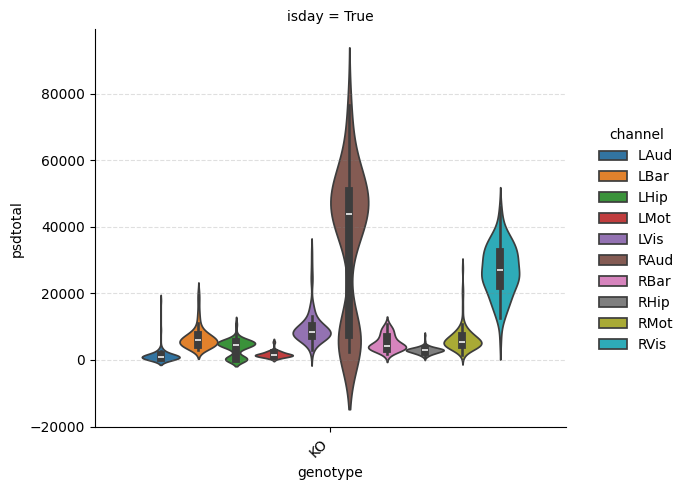

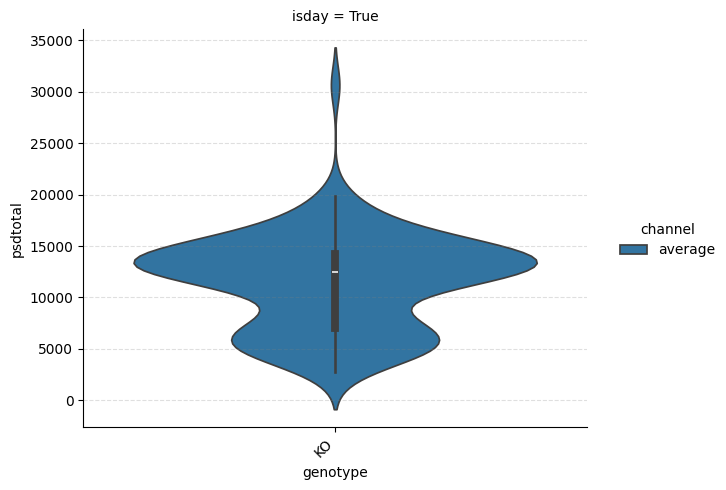

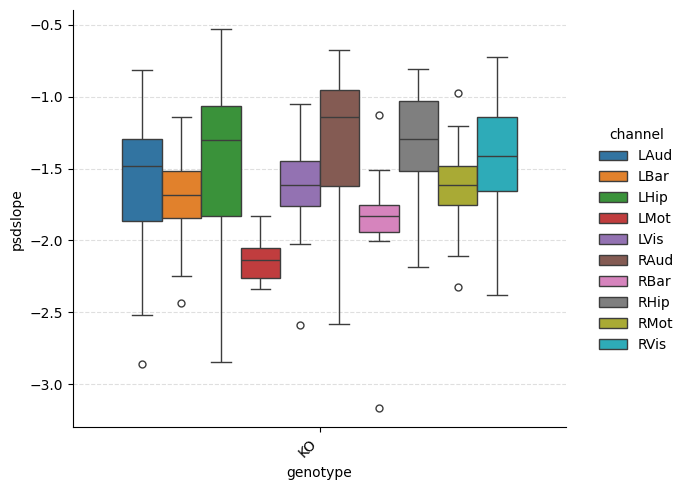

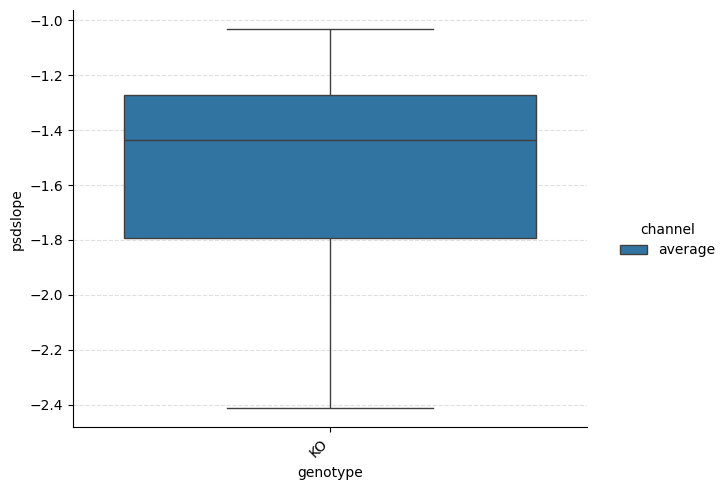

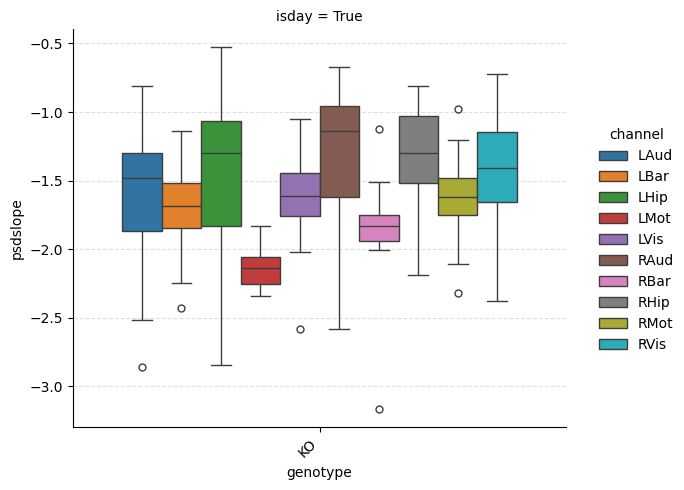

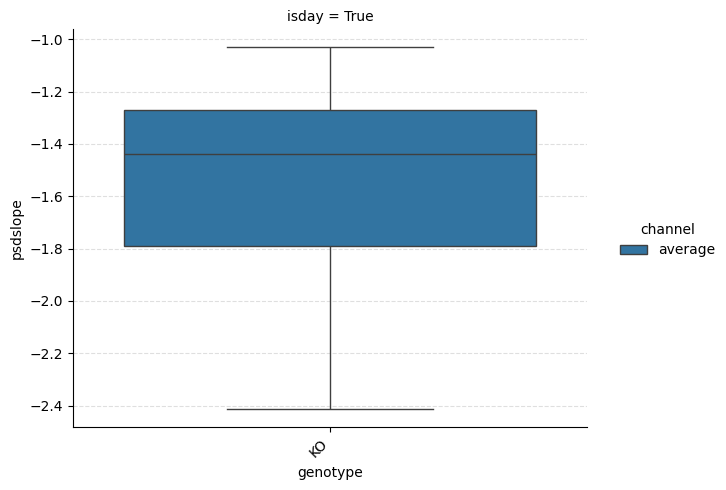

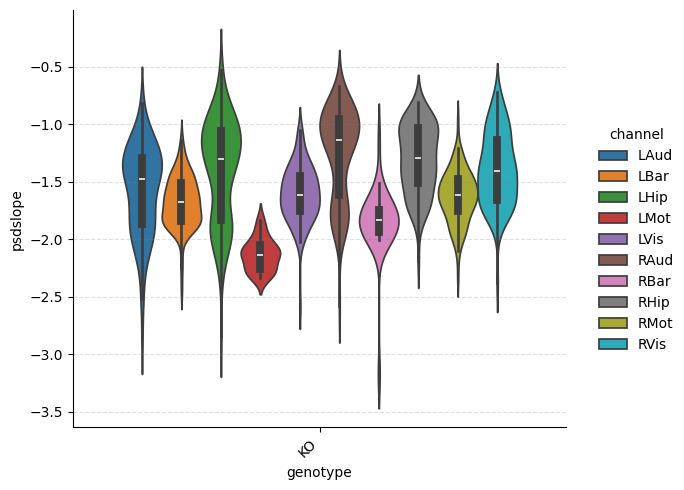

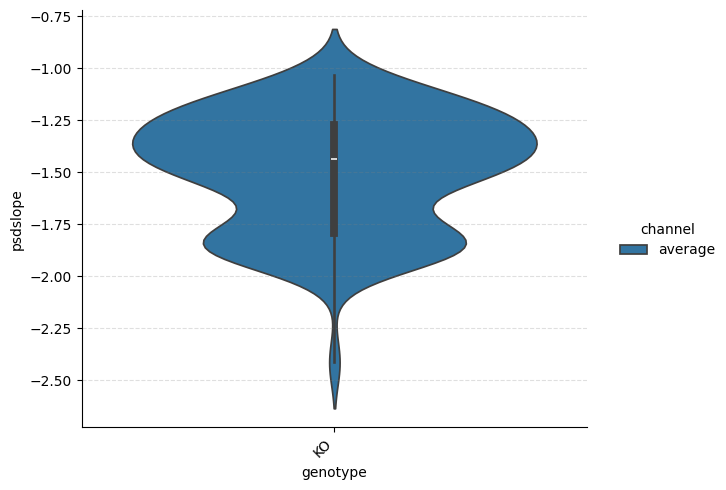

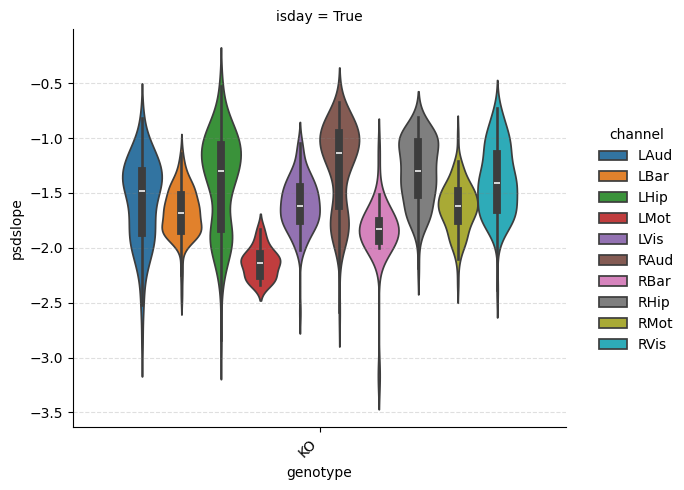

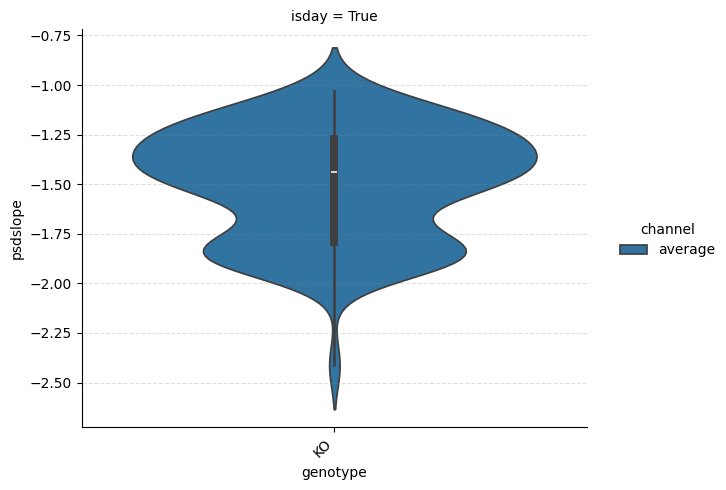

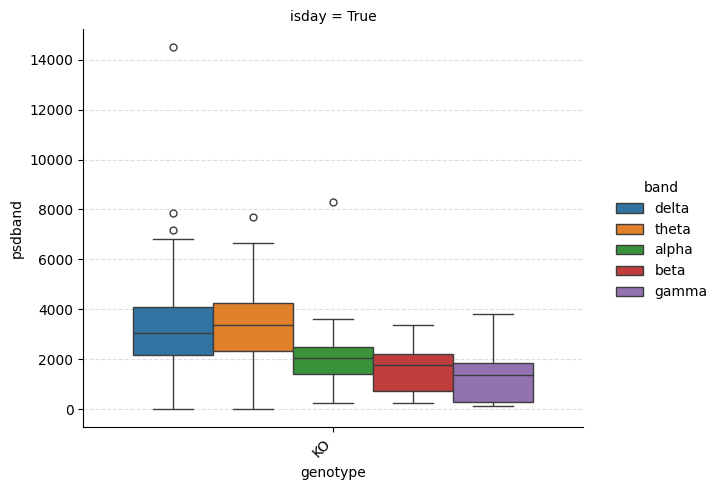

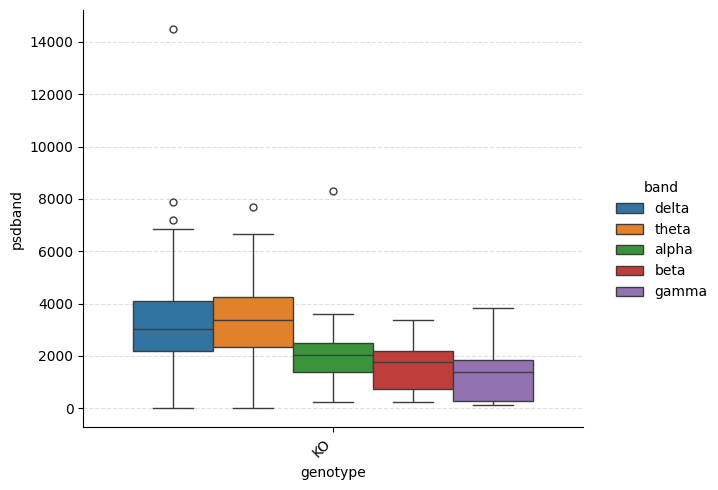

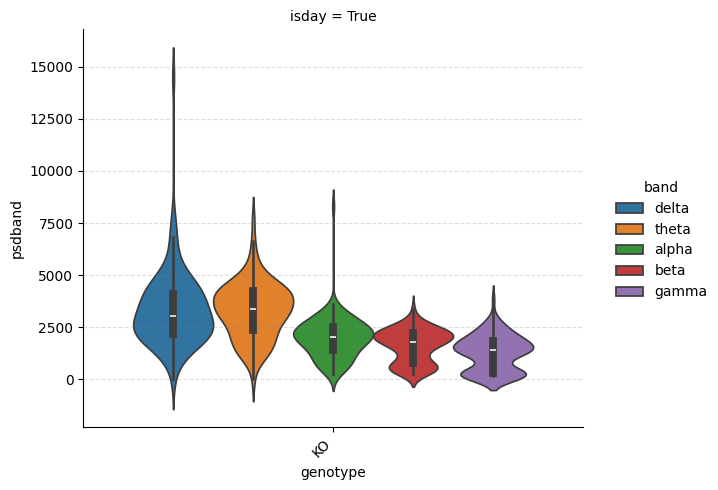

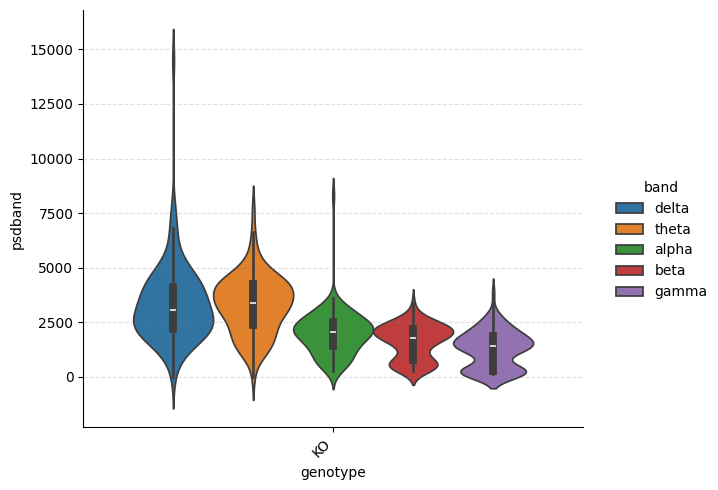

In [20]:
for feature in constants.LINEAR_FEATURES:
    if feature in ['nspike', 'logrms', 'logampvar', 'logpsdtotal', 'lognspike', 'logpsdband', 'logpsdfrac']:
        print(f"Skipping feature {feature}")
        continue
    for kind in ['box', 'violin']:
        for groupby in ['genotype', ['genotype', 'isday']]:
            for collapse in [False, True]:
                ep.plot_catplot(feature, groupby=groupby, kind=kind, collapse_channels=collapse)
for kind in ['box', 'violin']:
    ep.plot_catplot('psdband', groupby=['genotype', 'isday'], 
                    x='genotype',
                    col='isday',
                    hue='band',
                    kind=kind, collapse_channels=True)
    ep.plot_catplot('psdband', groupby=['genotype'], 
                    x='genotype',
                    hue='band',
                    kind=kind, collapse_channels=True)

2025-05-20 22:44:06,664 - DEBUG - groups: ['A10', 'F22']
2025-05-20 22:44:06,665 - DEBUG - vals.shape: (31, 10)
2025-05-20 22:44:06,669 - DEBUG - vals.shape: (117, 10)


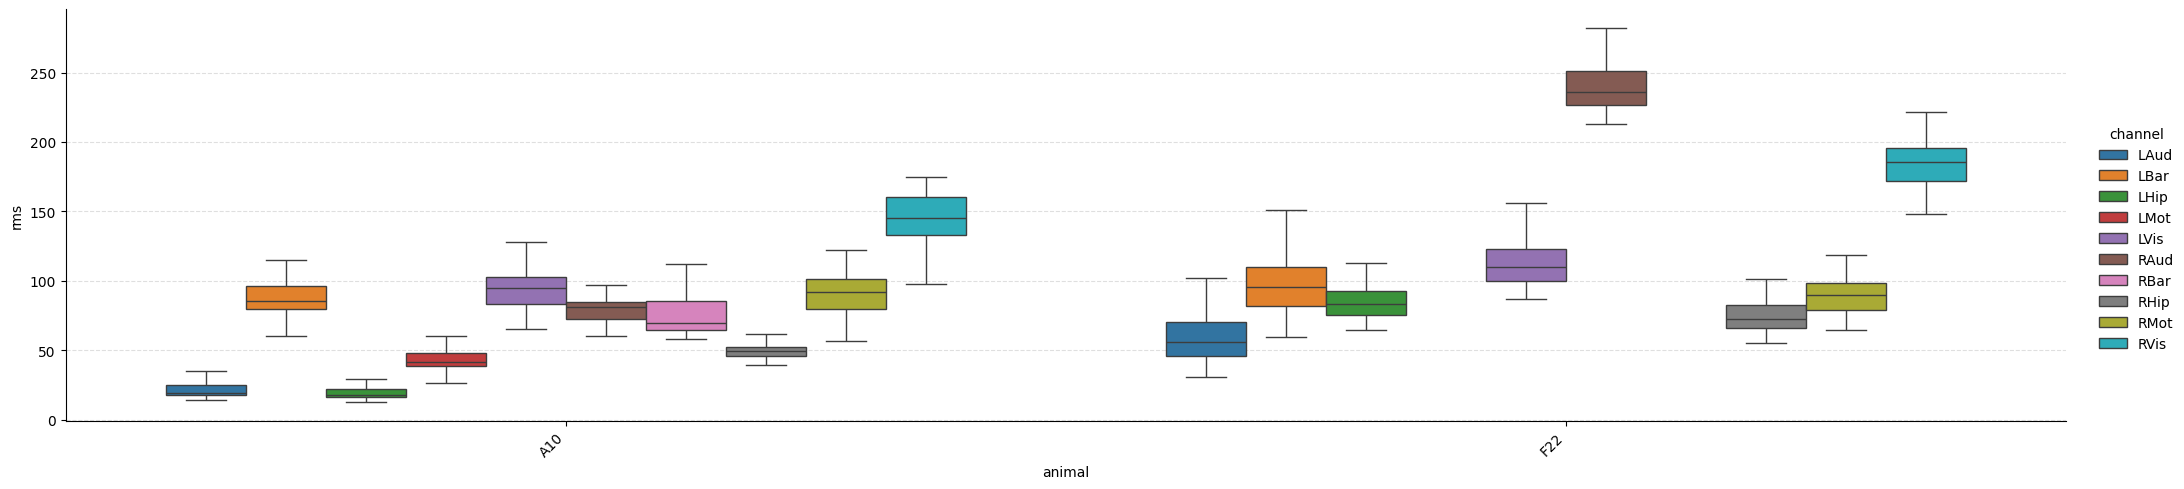

In [21]:
ep.plot_catplot('rms', groupby='animal', kind='box', catplot_params={'showfliers': False, 'aspect': 4})

2025-05-20 22:45:07,470 - DEBUG - groups: ['A10', 'F22']
2025-05-20 22:45:07,473 - DEBUG - vals.shape: (31, 10, 10)
2025-05-20 22:45:07,478 - DEBUG - vals.shape: (117, 10, 10)
2025-05-20 22:45:07,758 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7fb1583f88e0>
2025-05-20 22:45:07,801 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7fb15832c430>


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:406: RuntimeWarning: Mean of empty slice
  avg_matrix = np.nanmean(matrices, axis=0)


2025-05-20 22:45:08,061 - DEBUG - groups: ['A10', 'F22']
2025-05-20 22:45:08,066 - DEBUG - vals.shape: (31, 5, 10, 10)
2025-05-20 22:45:08,067 - DEBUG - vals.shape: (31, 5, 10, 10)
2025-05-20 22:45:08,073 - DEBUG - vals.shape: (117, 5, 10, 10)
2025-05-20 22:45:08,074 - DEBUG - vals.shape: (117, 5, 10, 10)
2025-05-20 22:45:09,333 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7fb1522ba770>
2025-05-20 22:45:09,413 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7fb152255720>
2025-05-20 22:45:09,474 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7fb1523169e0>
2025-05-20 22:45:09,535 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7fb1524891b0>
2025-05-20 22:45:09,626 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7fb1525f42e0>
2025-05-20 22:45:09,690 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7fb15251f580>
2025-05-20 22:45:09,730 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7fb1526

/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:406: RuntimeWarning: Mean of empty slice
  avg_matrix = np.nanmean(matrices, axis=0)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:406: RuntimeWarning: Mean of empty slice
  avg_matrix = np.nanmean(matrices, axis=0)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:406: RuntimeWarning: Mean of empty slice
  avg_matrix = np.nanmean(matrices, axis=0)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:406: RuntimeWarning: Mean of empty slice
  avg_matrix = np.nanmean(matrices, axis=0)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:406: RuntimeWarning: Mean of empty slice
  avg_matrix = np.nanmean(matrices, axis=0)


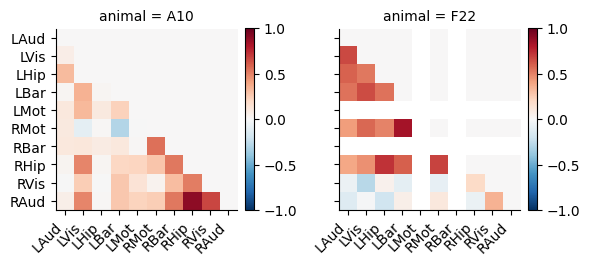

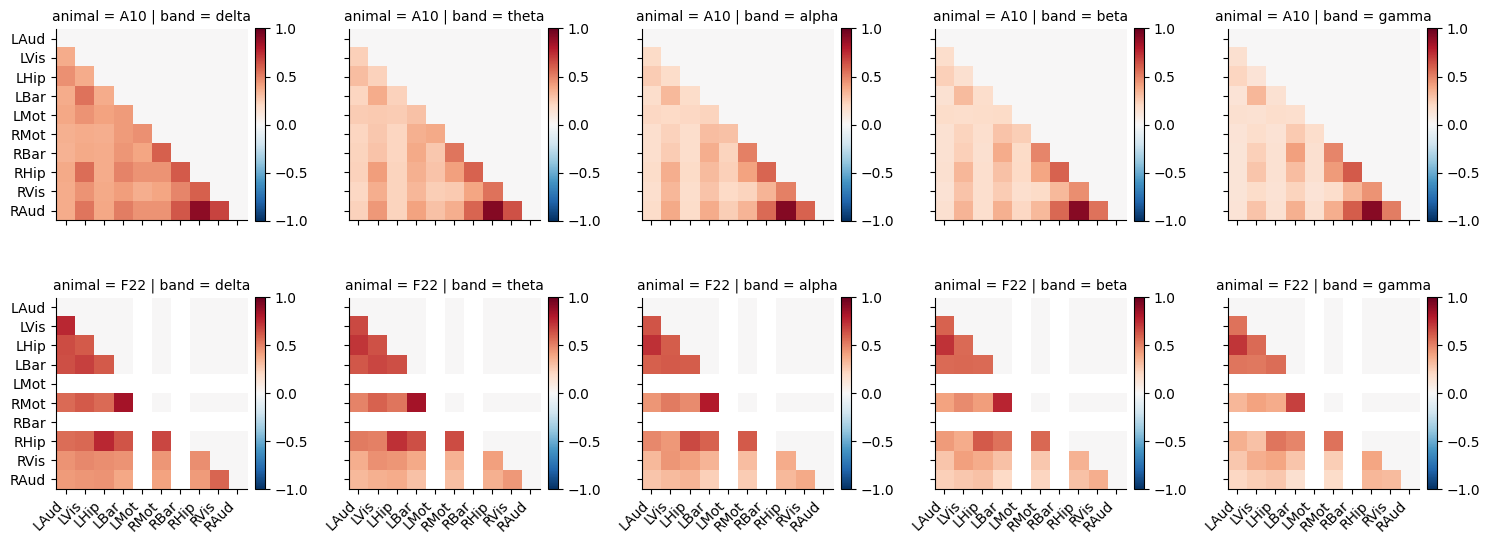

In [25]:
ep.plot_heatmap('pcorr', groupby='animal')
ep.plot_heatmap('cohere', groupby='animal', col='band', row='animal')

In [16]:
logger.setLevel(logging.DEBUG)

In [ ]:
for e in sar:
    e.convert_to_mne(chunk_len=1440)
    e.save_fif_and_json(Path(f'./test-mnes/{e.animal_day}').resolve(), overwrite=True)

NameError: name 'sar' is not defined

In [17]:
reconstruct_sas = visualization.SpikeAnalysisResult.load_fif_and_json('./test-mnes/A5 WT Dec-12-2023')
mne_obj = reconstruct_sas.result_mne

Opening raw data file test-mnes/A5 WT Dec-12-2023/A5-WT-A5 WT Dec-12-2023-raw.fif...
    Reading extended channel information
Isotrak not found
    Range : 0 ... 40067758 =      0.000 ... 40067.758 secs
Ready.
2025-03-21 21:23:35,173 - INFO - Channel names: 	['Intan Input (1)/PortB L Aud Ctx', 'Intan Input (1)/PortB L Vis Ctx', 'Intan Input (1)/PortB L Hipp', 'Intan Input (1)/PortB L Barrel', 'Intan Input (1)/PortB L Motor', 'Intan Input (1)/PortB R Motor', 'Intan Input (1)/PortB R Barrel', 'Intan Input (1)/PortB R Hipp', 'Intan Input (1)/PortB R Vis Ctx', 'Intan Input (1)/PortB R Aud Ctx']
2025-03-21 21:23:35,174 - INFO - Channel abbreviations: 	['LAud', 'LVis', 'LHip', 'LBar', 'LMot', 'RMot', 'RBar', 'RHip', 'RVis', 'RAud']


Used Annotations descriptions: [np.str_('Intan Input (1)/PortB L Aud Ctx'), np.str_('Intan Input (1)/PortB L Barrel'), np.str_('Intan Input (1)/PortB L Hipp'), np.str_('Intan Input (1)/PortB L Motor'), np.str_('Intan Input (1)/PortB L Vis Ctx'), np.str_('Intan Input (1)/PortB R Aud Ctx'), np.str_('Intan Input (1)/PortB R Barrel'), np.str_('Intan Input (1)/PortB R Hipp'), np.str_('Intan Input (1)/PortB R Motor'), np.str_('Intan Input (1)/PortB R Vis Ctx')]


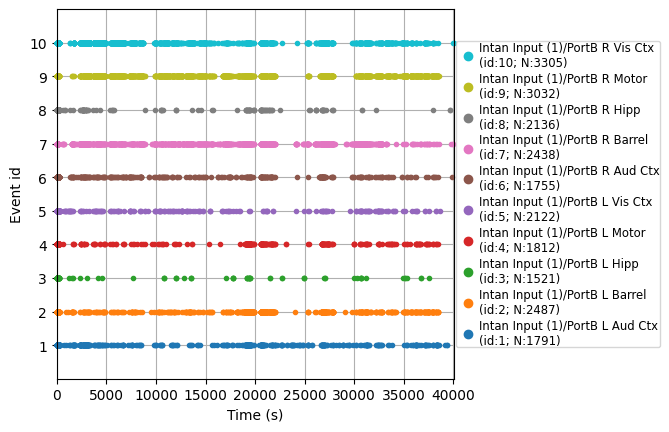

In [18]:
logger.setLevel(logging.WARNING)
events, event_id = mne.events_from_annotations(raw=mne_obj)
fig = mne.viz.plot_events(events, sfreq=mne_obj.info['sfreq'], first_samp=mne_obj.first_samp, event_id=event_id)